In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.set_random_seed(777) 

Instructions for updating:
non-resource variables are not supported in the long term


### H(x)=Wx+b

In [2]:
#임의로 주어진 데이터
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [3]:
W = tf.Variable(tf.random_normal([1]), name='weight') #랜덤한 값을 주기위함, 가중치
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

In [4]:
hypothesis =X* W #노드

비용함수

In [5]:
cost = tf.reduce_mean(tf.square(hypothesis -Y))
#square >제곱
#reduce_mean>평균내주는 값. 

In [6]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) 
# train = (cost)
#가장 작은 비용을 찾기 위한 경사하강법
learning_rate=0.1#가장 작은 비용을 찾기 위한 경사하강법
gradient=tf.reduce_mean((W*X-Y)*X) ##미분
descent=W-learning_rate*gradient
update=(descent)

In [7]:
sess = tf.Session() #노드를 실행시킨다. 
sess.run(tf.global_variables_initializer())

In [8]:
for step in range(21):
    sess.run(update,  feed_dict={X:x_train, Y:y_train})
#     if step % 200 == 0:
    print(step, sess.run(cost, feed_dict={X:x_train, Y:y_train}), sess.run(W)) # 단계, 오차, 가중치, 바이어스

0 0.22753704 [0.77918804]
1 0.06472163 [0.8822336]
2 0.018409716 [0.93719125]
3 0.005236534 [0.966502]
4 0.0014895027 [0.9821344]
5 0.000423682 [0.99047166]
6 0.00012051514 [0.9949182]
7 3.4279296e-05 [0.9972897]
8 9.750313e-06 [0.9985545]
9 2.7733452e-06 [0.9992291]
10 7.889824e-07 [0.99958885]
11 2.243758e-07 [0.9997807]
12 6.384909e-08 [0.99988306]
13 1.8124851e-08 [0.99993765]
14 5.154282e-09 [0.99996674]
15 1.4765504e-09 [0.99998224]
16 4.1801348e-10 [0.9999905]
17 1.2039081e-10 [0.99999493]
18 3.389407e-11 [0.9999973]
19 9.549694e-12 [0.99999857]
20 2.8954616e-12 [0.9999992]


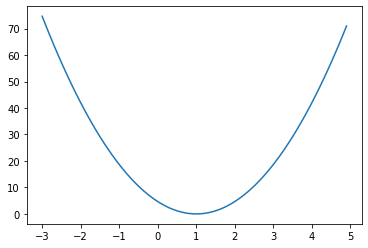

In [9]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_history = []
cost_history = []

# Launch the graph in a session.
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_W = i * 0.1
        curr_cost = sess.run(cost, feed_dict={W: curr_W})

        W_history.append(curr_W)
        cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

#### multi

In [25]:
#Matrix로 표현
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

In [26]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


In [27]:
hypothesis = tf.matmul(X, W) + b #행렬곱(matrix multiplication)

In [28]:
#cost를 최소로하는
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [29]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [30]:
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  22180.521 
Prediction:
 [[23.649254]
 [23.220978]
 [25.697884]
 [23.894196]
 [20.235092]]
10 Cost:  6.40958 
Prediction:
 [[155.37003]
 [181.55414]
 [181.69858]
 [193.7767 ]
 [141.00569]]
20 Cost:  6.1856184 
Prediction:
 [[155.7608 ]
 [182.03844]
 [182.1681 ]
 [194.28967]
 [141.37735]]
30 Cost:  6.1647844 
Prediction:
 [[155.75424]
 [182.04512]
 [182.16705]
 [194.29016]
 [141.38469]]
40 Cost:  6.1440825 
Prediction:
 [[155.74654]
 [182.05035]
 [182.16461]
 [194.28915]
 [141.39096]]
50 Cost:  6.123498 
Prediction:
 [[155.73883]
 [182.05557]
 [182.16216]
 [194.28809]
 [141.39716]]
60 Cost:  6.1029973 
Prediction:
 [[155.73114]
 [182.06076]
 [182.15971]
 [194.28708]
 [141.40335]]
70 Cost:  6.0825906 
Prediction:
 [[155.72348]
 [182.06596]
 [182.15727]
 [194.28606]
 [141.40953]]
80 Cost:  6.062278 
Prediction:
 [[155.71582]
 [182.07112]
 [182.1548 ]
 [194.28502]
 [141.4157 ]]
90 Cost:  6.0420814 
Prediction:
 [[155.70816]
 [182.07626]
 [182.15237]
 [194.28398]
 [141.42183]]
100 C

830 Cost:  4.800378 
Prediction:
 [[155.19493]
 [182.42265]
 [181.98811]
 [194.21947]
 [141.8306 ]]
840 Cost:  4.7865868 
Prediction:
 [[155.18863]
 [182.42685]
 [181.98607]
 [194.21872]
 [141.83554]]
850 Cost:  4.772841 
Prediction:
 [[155.18237]
 [182.4311 ]
 [181.98405]
 [194.21799]
 [141.84047]]
860 Cost:  4.7591906 
Prediction:
 [[155.17612]
 [182.43532]
 [181.98207]
 [194.21727]
 [141.84538]]
870 Cost:  4.7455964 
Prediction:
 [[155.16988]
 [182.43951]
 [181.98006]
 [194.21654]
 [141.85028]]
880 Cost:  4.7320566 
Prediction:
 [[155.16364]
 [182.44368]
 [181.97803]
 [194.2158 ]
 [141.85516]]
890 Cost:  4.7186227 
Prediction:
 [[155.15746]
 [182.44788]
 [181.97604]
 [194.21509]
 [141.86003]]
900 Cost:  4.7052183 
Prediction:
 [[155.15126]
 [182.45206]
 [181.97406]
 [194.21437]
 [141.8649 ]]
910 Cost:  4.691893 
Prediction:
 [[155.1451 ]
 [182.45622]
 [181.97209]
 [194.21368]
 [141.86975]]
920 Cost:  4.6786013 
Prediction:
 [[155.13892]
 [182.46036]
 [181.9701 ]
 [194.21298]
 [141.8